1. Сгенерировать процессы: винеровский, AR (с несколькими разными параметрами), MA (с несколькими разными параметрами), Марковский процесс, GARCH
2. Сгенерировать процессы: геометрическое броуновское движение, Merton Jump diffusion, Heston Stochastic volatility, Cox–Ingersoll–Ross, Орнштейна-Уленбека       
3. Для сгенерированных процессов на всей выборке и на подвыборках посчитать характеристики получившейся при этом выборки (среднее, дисперсию и т.д.) и распределения для нескольких срезов 2-3 процессов
4. Провести тест на стационарность для некоторых траекторий. Перейти к доходностям. Посчитать VaR для некоторых процессов
5. Для некоторых процессов найти наиболее близкие (по корреляции) траектории у разных процессов, рассчитать отклонения и объяснить их
6. Для некоторых процессов рассчитать отклонения между наименьшими траекториями и объяснить их
*Пункт со звёздочкой - посчитать корреляции для реальных данных (коронавирус, индексы), посмотреть, на какие процессы похожи реальные данные.
В каждом задании - рисовать картинки

In [68]:
import sdepy
import warnings
import scipy as sp
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
import seaborn as sns


np.random.seed(42)
sp.random.seed(42)
plt.style.use('ggplot')
warnings.filterwarnings("ignore")

# Сгенерировать процессы: винеровский, AR (с несколькими разными параметрами), MA (с несколькими разными параметрами), Марковский процесс, GARCH

## Винеровский

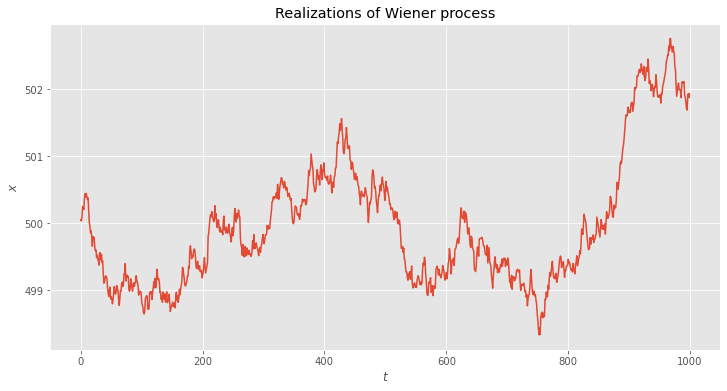

In [2]:
# Initial condition.
x = 500

# Number of iterations to compute.
n = 1000
price = []

# Iterate to compute the steps of the Brownian motion.
for k in range(n):
    x = x + norm.rvs(scale=0.1)
    price.append(x)

plt.plot(price)
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.title(
    "Realizations of Wiener process"
)
plt.show()

final_df = pd.DataFrame(price, columns=['wiener'])

## AR

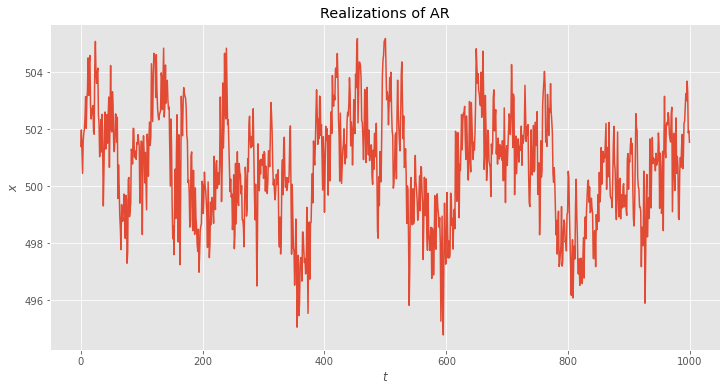

In [3]:
S = 500 # current stock price
arparams = np.array([.75, -.25, .5, -.1]) # add 4 lags
maparams = np.array([0, 0])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
AR_object1 = ArmaProcess(ar, ma)
simulated_data_1 = S+AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.title(
    "Realizations of AR"
)
plt.show()

final_df['AR_1'] = simulated_data_1

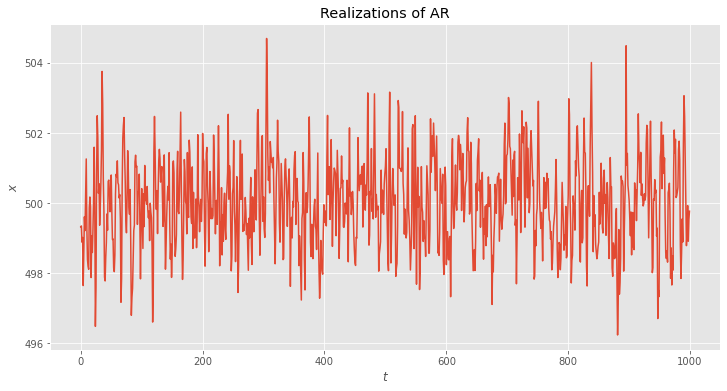

In [4]:
arparams = np.array([.75, -.25]) # add 2 lags
maparams = np.array([0, 0])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
AR_object1 = ArmaProcess(ar, ma)
simulated_data_2 = S+AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.title(
    "Realizations of AR"
)
plt.show()

final_df['AR_2'] = simulated_data_2

## MA

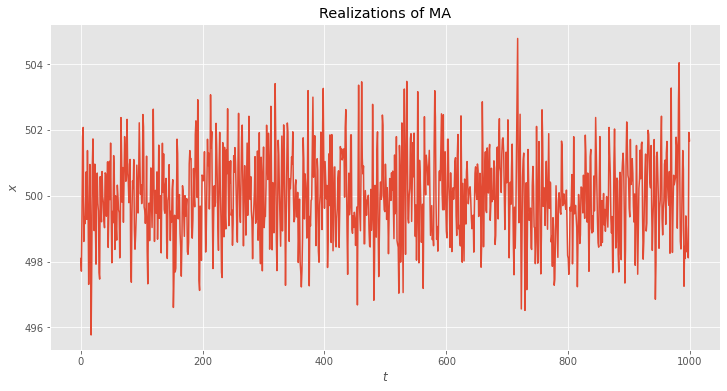

In [5]:
S = 500 # current stock price
arparams = np.array([0, 0])
maparams = np.array([0.75, -0.25])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
AR_object1 = ArmaProcess(ar, ma)
simulated_data_1 = S+AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.title(
    "Realizations of MA"
)
plt.show()

final_df['MA_1'] = simulated_data_1

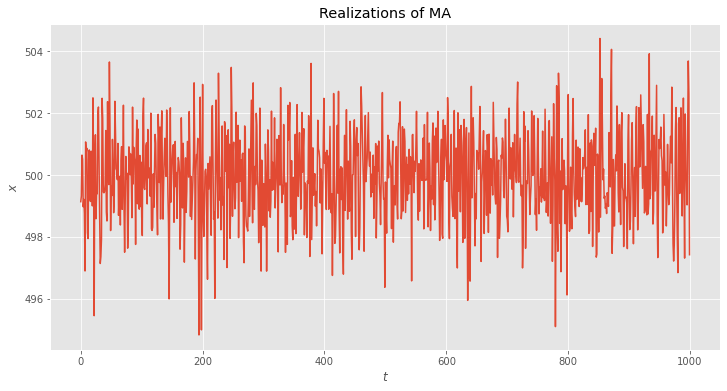

In [6]:
S = 500 # current stock price
arparams = np.array([0, 0])
maparams = np.array([0.75, -0.75])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
AR_object1 = ArmaProcess(ar, ma)
simulated_data_2 = S+AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.title(
    "Realizations of MA"
)
plt.show()

final_df['MA_2'] = simulated_data_2

## Марковский процесс

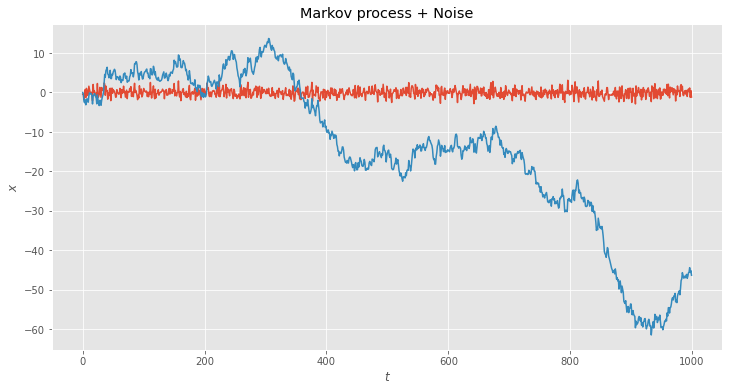

In [7]:
N = 1000
sigma = 1
 
fSignal = np.zeros(N)
fNoise = np.random.normal(0, sigma, N)
for i in range(1, N):
    fSignal[i] = fSignal[i-1] + fNoise[i]
 
plt.plot(fNoise)
plt.plot(fSignal)
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.title(
    "Markov process + Noise"
)
plt.grid(True)
plt.show()


## GARCH

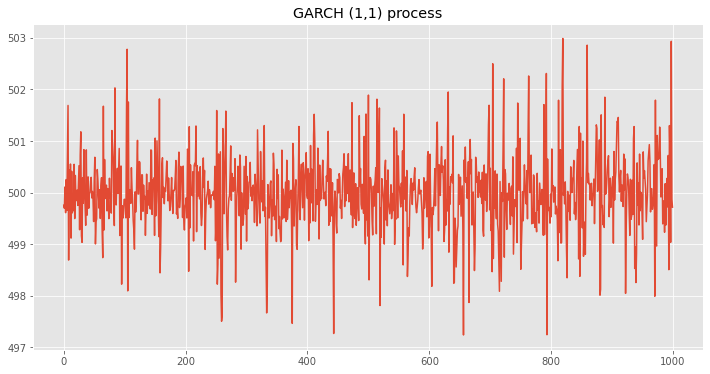

In [8]:
S = 500  #initial price
n = 1000          # n is the number of observations
n1 = 100       # we need to drop the first several observations 
n2=n+n1         # sum of two numbers
#
a=(0.1,0.3)     # ARCH coefficient
alpha=(0.1,0.3) # GARCH (1,1) coefficients alpha0 and alpha1, see Equation (3)
beta=0.2 
errors=sp.random.normal(0,1,n2) 
t=sp.zeros(n2)
t[0]=sp.random.normal(0,sp.sqrt(a[0]/(1-a[1])),1)
#
for i in range(1,n2-1): 
    t[i]=errors[i]*sp.sqrt(alpha[0]+alpha[1]*errors[i-1]**2+beta*t[i-1]**2)
#
y=t[n1-1:-1]    # drop the first n1 observations 
plt.title('GARCH (1,1) process')
x=range(n) 
plt.plot(x,y+S)
plt.show()

final_df['garch'] = y+S

# Сгенерировать процессы: геометрическое броуновское движение, Merton Jump diffusion, Heston Stochastic volatility, Cox–Ingersoll–Ross, Орнштейна-Уленбека

## Геометрическое броуновское движение

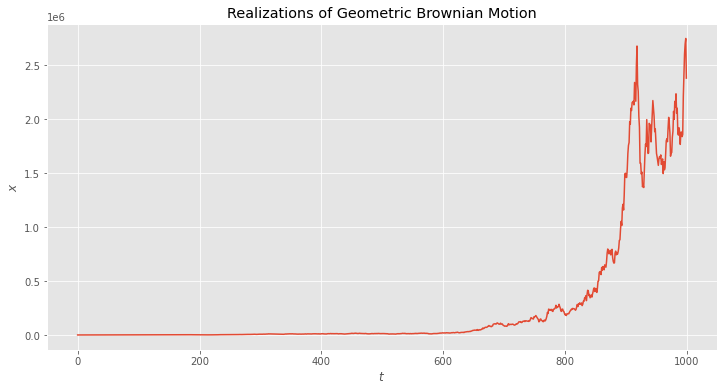

In [9]:
mu = 0.1
n = 1000
dt = 0.1
x0 = 500


sigma = 0.2

x = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(1, n)).T
)
x = x0 * x.cumprod(axis=0)

plt.plot(x)
plt.xlabel("$t$")
plt.ylabel("$x$")
plt.title(
    "Realizations of Geometric Brownian Motion"
)
plt.show()

final_df['gbm'] = x

## Merton Jump diffusion

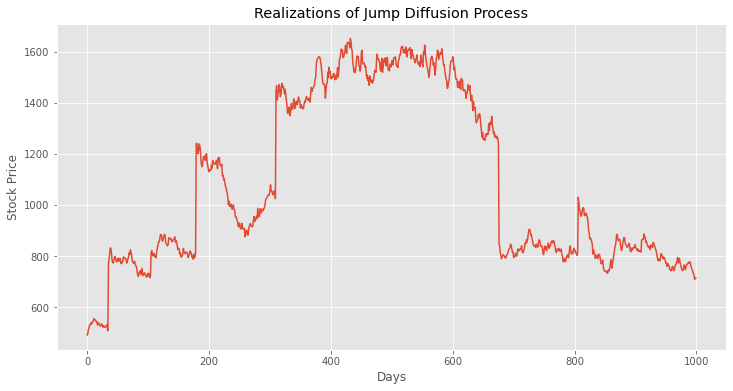

In [10]:
def merton_jump_paths(S, T, r, sigma,  lam, m, v, steps, Npaths):
    size=(steps,Npaths)
    dt = T/steps 
    poi_rv = np.multiply(np.random.poisson( lam*dt, size=size),
                         np.random.normal(m,v, size=size)).cumsum(axis=0)
    geo = np.cumsum(((r -  sigma**2/2 -lam*(m  + v**2*0.5))*dt +\
                              sigma*np.sqrt(dt) * \
                              np.random.normal(size=size)), axis=0)
    
    return np.exp(geo+poi_rv)*S


S = 500 # current stock price
T = 5 # time to maturity
r = 0.04 # risk free rate
m = 0 # meean of jump size
v = 0.3 # standard deviation of jump
lam = 2 # intensity of jump i.e. number of jumps per annum
steps = 1000 # time steps
Npaths = 1 # number of paths to simulate
sigma = 0.2 # annaul standard deviation , for weiner process

j = merton_jump_paths(S, T, r, sigma, lam, m, v, steps, Npaths)

plt.plot(j)
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Realizations of Jump Diffusion Process')

final_df['merton_jump'] = j

# Heston Stochastic volatility

In [11]:
def generate_heston_paths(S, T, r, kappa, theta, v_0, rho, xi, 
                          steps, Npaths, return_vol=False):
    dt = T/steps
    size = (Npaths, steps)
    prices = np.zeros(size)
    sigs = np.zeros(size)
    S_t = S
    v_t = v_0
    for t in range(steps):
        WT = np.random.multivariate_normal(np.array([0,0]), 
                                           cov = np.array([[1,rho],
                                                          [rho,1]]), 
                                           size=paths) * np.sqrt(dt) 
        
        S_t = S_t*(np.exp( (r- 0.5*v_t)*dt+ np.sqrt(v_t) *WT[:,0] ) ) 
        v_t = np.abs(v_t + kappa*(theta-v_t)*dt + xi*np.sqrt(v_t)*WT[:,1])
        prices[:, t] = S_t
        sigs[:, t] = v_t
    
    if return_vol:
        return prices, sigs
    
    return prices

In [12]:
kappa = 4
theta = 0.02
v_0 =  0.02
xi = 0.9
r = 0.02
S = 500
paths = 1000
steps = 1000
T = 5

prices_pos = generate_heston_paths(S, T, r, kappa, theta,
                                    v_0, rho=-0.9, xi=xi, steps=steps, Npaths=paths,
                                    return_vol=False)[:,-1] 

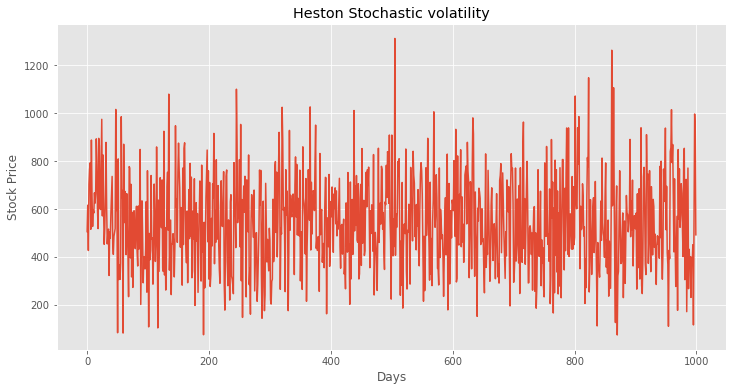

In [13]:
plt.plot(prices_pos)
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Heston Stochastic volatility')

final_df['heston_stohastic'] = prices_pos

## Cox–Ingersoll–Ross

In [14]:
""" Simulate interest rate path by the CIR model """
def cir(r0=5, K=0.1, theta=0.1, sigma=0.01, T=1, n=999):
    dt = T/n
    rates = [r0]
    for i in range(n):
        dr = K*(theta-rates[-1])*dt + sigma*np.sqrt(rates[-1])*np.random.normal()
        rates.append(rates[-1] + dr)
    return rates

cir_sim = cir()
final_df['Cox–Ingersoll–Ross'] = cir_sim

Text(0.5, 1.0, 'Cox–Ingersoll–Ross')

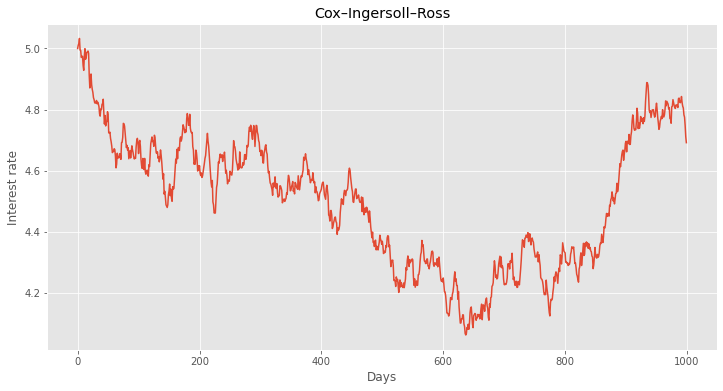

In [15]:
plt.plot(cir_sim)
plt.xlabel('Days')
plt.ylabel('Interest rate')
plt.title('Cox–Ingersoll–Ross')



## Процесс Орнштейна-Уленбека

In [16]:
P = sdepy.ornstein_uhlenbeck_process(paths=1000, x0=-500, theta=0.1, k=1.1, sigma=2)
x  = P(timeline=(0.2, 2))[1]
final_df['ornstein_uhlenbec'] = x

Text(0.5, 1.0, 'Ornstein_uhlenbec')

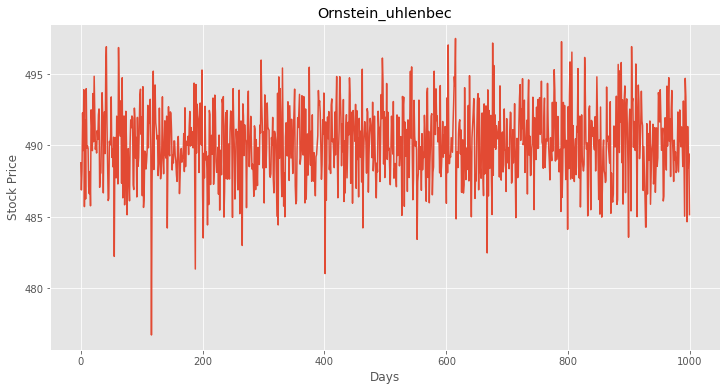

In [17]:
plt.plot(x)
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Ornstein_uhlenbec')

In [18]:
final_df

,wiener,AR_1,AR_2,MA_1,MA_2,garch,gbm,merton_jump,heston_stohastic,Cox–Ingersoll–Ross,ornstein_uhlenbec
0,500.049671,501.399355,499.324822,498.092192,499.136506,499.753951,4.999710e+02,491.009536,505.630556,5.000000,488.788599
1,500.035845,501.974150,499.349098,497.708759,499.321176,499.696360,5.072693e+02,495.276291,616.008211,5.010703,486.890546
2,500.100614,501.190404,498.888198,499.418058,500.642234,500.108684,5.018031e+02,511.635484,426.929485,5.016072,488.217466
3,500.252917,500.452007,499.020912,501.792580,500.509546,499.610135,5.265027e+02,519.194608,703.034885,5.032809,492.282760
4,500.229501,501.586767,497.650020,502.075720,498.974102,500.251311,5.178785e+02,529.496298,765.880041,4.994801,489.649337
...,...,...,...,...,...,...,...,...,...,...,...
995,501.689212,503.682238,499.158301,498.291870,499.032927,500.627014,2.400087e+06,730.254887,115.887212,4.782642,484.663274
996,501.868981,503.326150,499.929432,498.459802,501.167716,499.036310,2.603958e+06,724.511900,523.919353,4.775400,491.324602
997,501.933065,501.866395,498.915738,498.114229,503.683192,502.931133,2.698184e+06,708.911814,996.951058,4.748080,488.455180
998,501.875947,501.946645,499.538622,501.922608,502.609161,499.872146,2.748646e+06,714.184216,924.619545,4.711489,489.421383


# Характеристики процессов

In [19]:
final_df.describe()

,wiener,AR_1,AR_2,MA_1,MA_2,garch,gbm,merton_jump,heston_stohastic,Cox–Ingersoll–Ross,ornstein_uhlenbec
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.965035,500.687413,500.011668,499.972152,499.951332,499.978480,2.668804e+05,1082.626913,542.442048,4.501881,490.105745
std,0.955997,1.911247,1.254118,1.306724,1.427798,0.737584,5.787768e+05,334.441754,194.391586,0.216632,2.609812
min,498.333389,494.791046,496.240689,495.768740,494.830204,497.240211,3.909665e+02,491.009536,73.899543,4.062166,476.744127
25%,499.233011,499.290787,499.160555,499.109970,498.998815,499.584325,3.134618e+03,809.318792,406.606984,4.308276,488.334643
50%,499.755557,500.799454,500.031246,499.907968,499.937948,499.973015,1.293623e+04,913.920763,523.181895,4.530588,490.100464
75%,500.436076,502.014491,500.849665,500.861804,500.927218,500.365659,1.338949e+05,1457.485996,673.898225,4.666865,491.939617
max,502.758733,505.178284,504.696198,504.779774,504.411396,502.986265,2.748646e+06,1651.041363,1312.528272,5.032809,497.487131


In [20]:
final_df.kurtosis()

wiener                0.351869
AR_1                 -0.305136
AR_2                  0.084656
MA_1                 -0.036515
MA_2                  0.141547
garch                 1.997515
gbm                   4.699243
merton_jump          -1.438980
heston_stohastic      0.014301
Cox–Ingersoll–Ross   -0.938716
ornstein_uhlenbec     0.581075
dtype: float64

In [21]:
final_df.skew()

wiener                1.013488
AR_1                 -0.176194
AR_2                  0.146145
MA_1                  0.103427
MA_2                 -0.119103
garch                 0.065199
gbm                   2.438434
merton_jump           0.347618
heston_stohastic      0.287892
Cox–Ingersoll–Ross   -0.004534
ornstein_uhlenbec    -0.185696
dtype: float64

# Характеристики выборки 100 случайных элементов каждого процесса 

In [22]:
final_df.sample(n = 100).describe()

,wiener,AR_1,AR_2,MA_1,MA_2,garch,gbm,merton_jump,heston_stohastic,Cox–Ingersoll–Ross,ornstein_uhlenbec
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000
mean,499.924290,500.481235,499.876832,499.882687,499.856696,499.912679,2.580968e+05,1054.050457,509.658973,4.504732,490.090634
std,0.937088,1.895616,1.239969,1.245694,1.296703,0.857997,5.709680e+05,297.463848,199.718934,0.197198,2.428591
min,498.607052,495.471401,497.172885,496.559310,496.011803,497.506488,4.051300e+02,742.815552,74.807783,4.097265,484.440967
25%,499.219416,499.071775,498.974451,499.147015,499.120968,499.475044,2.967221e+03,807.613260,368.923717,4.327616,488.322261
50%,499.763087,500.555315,499.904972,499.708712,499.760532,499.995064,1.288962e+04,901.292488,487.475405,4.541021,489.987984
75%,500.359568,501.782159,500.763760,500.863451,500.640869,500.344854,1.469049e+05,1384.087881,617.534617,4.646041,491.883284
max,502.530529,504.837913,503.165629,502.871318,502.863348,502.986265,2.166932e+06,1605.532359,1263.427082,4.822352,495.703085


In [23]:
final_df.sample(n = 100).kurtosis()

wiener                0.700693
AR_1                  0.101989
AR_2                 -0.726235
MA_1                  0.197815
MA_2                  0.613824
garch                 0.585284
gbm                   6.480867
merton_jump          -1.660575
heston_stohastic     -0.146715
Cox–Ingersoll–Ross   -0.412131
ornstein_uhlenbec    -0.223759
dtype: float64

In [24]:
final_df.sample(n = 100).skew()

wiener                1.169450
AR_1                  0.082055
AR_2                  0.151022
MA_1                  0.471629
MA_2                 -0.386637
garch                -0.747251
gbm                   3.188158
merton_jump           0.077611
heston_stohastic     -0.043641
Cox–Ingersoll–Ross   -0.041449
ornstein_uhlenbec     0.043201
dtype: float64

# Проверка на стационарность

In [31]:
import statsmodels.api as sm

stationarity_df=pd.DataFrame(index=final_df.columns, columns=['stationarity'])
for i in range (len(final_df.columns)):
    test = sm.tsa.adfuller(final_df.iloc[:,i])
    if test[0]> test[4]['5%']:
        stationarity_df['stationarity'][i] = 'No'
    else:
        stationarity_df['stationarity'][i] = 'Yes'

In [33]:
stationarity_df

,stationarity
wiener,No
AR_1,Yes
AR_2,Yes
MA_1,Yes
MA_2,Yes
garch,Yes
gbm,No
merton_jump,No
heston_stohastic,Yes
Cox–Ingersoll–Ross,No


# Расчет Var

## wiener process

In [46]:
ret = final_df.wiener.pct_change()
ret = ret.dropna()

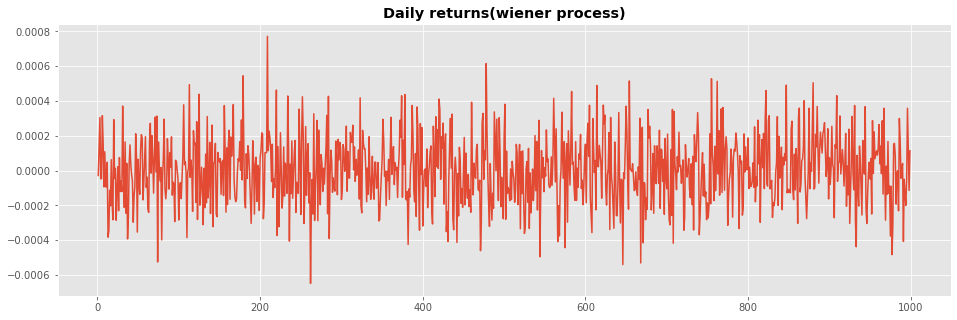

In [38]:
fig = plt.figure(figsize=(16, 5))

ret.plot()
plt.title("Daily returns(wiener process)", weight="bold")

plt.show()

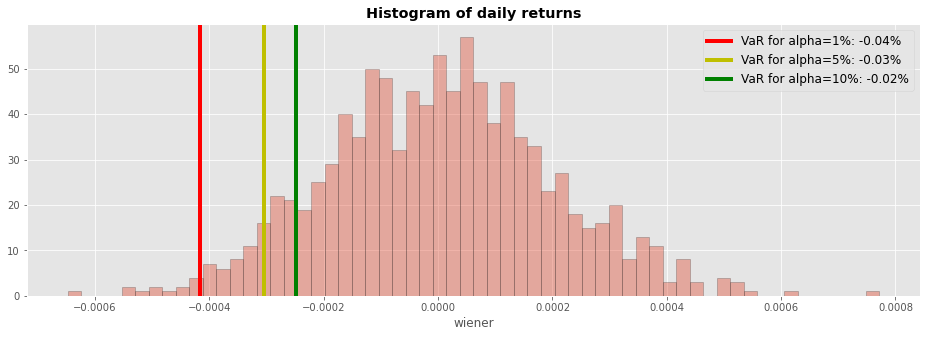

In [69]:
VaR_HS_01 = ret.quantile(0.01)
VaR_HS_05 = ret.quantile(0.05)
VaR_HS_10 = ret.quantile(0.10)

fig = plt.figure(figsize=(16, 5))

sns.distplot(ret, hist=True, kde=False, 
             bins=60,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.axvline(x=VaR_HS_01, linewidth=4, color="r")
plt.axvline(x=VaR_HS_05, linewidth=4, color="y")
plt.axvline(x=VaR_HS_10, linewidth=4, color="g")

plt.title("Histogram of daily returns", weight="bold")

plt.legend(['VaR for alpha=1%: {:.2f}%'.format(100*VaR_HS_01),
            'VaR for alpha=5%: {:.2f}%'.format(100*VaR_HS_05),
            'VaR for alpha=10%: {:.2f}%'.format(100*VaR_HS_10)], fontsize=12)

plt.show()

## AR_1 process

In [70]:
ret = final_df.AR_1.pct_change()
ret = ret.dropna()

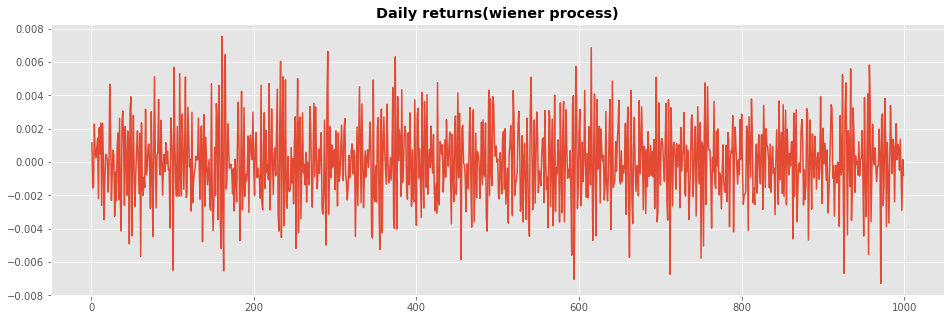

In [71]:
fig = plt.figure(figsize=(16, 5))

ret.plot()
plt.title("Daily returns(wiener process)", weight="bold")

plt.show()

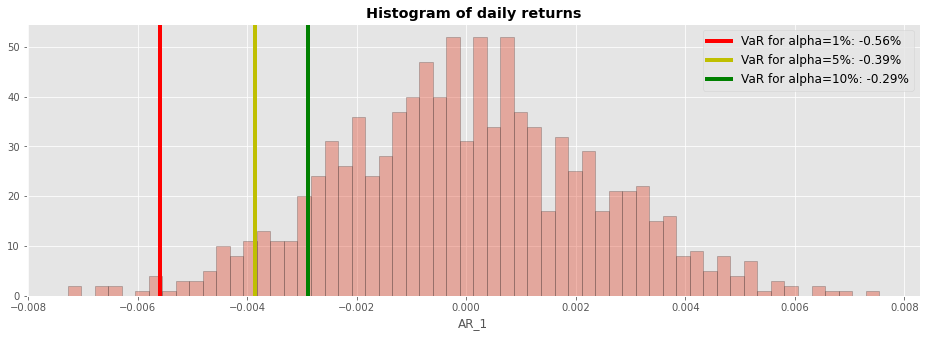

In [72]:
VaR_HS_01 = ret.quantile(0.01)
VaR_HS_05 = ret.quantile(0.05)
VaR_HS_10 = ret.quantile(0.10)

fig = plt.figure(figsize=(16, 5))

sns.distplot(ret, hist=True, kde=False, 
             bins=60,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.axvline(x=VaR_HS_01, linewidth=4, color="r")
plt.axvline(x=VaR_HS_05, linewidth=4, color="y")
plt.axvline(x=VaR_HS_10, linewidth=4, color="g")

plt.title("Histogram of daily returns", weight="bold")

plt.legend(['VaR for alpha=1%: {:.2f}%'.format(100*VaR_HS_01),
            'VaR for alpha=5%: {:.2f}%'.format(100*VaR_HS_05),
            'VaR for alpha=10%: {:.2f}%'.format(100*VaR_HS_10)], fontsize=12)

plt.show()

# Нахождение близких по корреляции траекторий

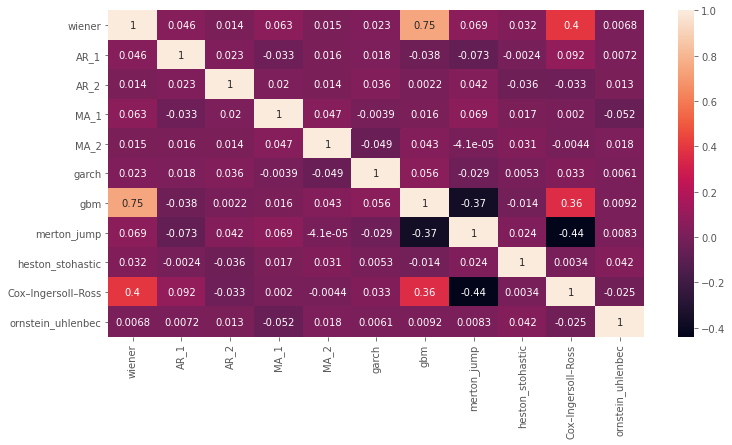

In [84]:
corr = final_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True)

Большую корреляцию имеют винеровский процесс и геометрическое броуновское движение. Это неудивительно, так как геометрическое броуновское движение по определению -  случайный процесс с непрерывным временем, логарифм которого представляет собой винеровский процесс.Процесс Кокса – Ингерсолла – Росса тоже имеет положительную корреляцию с винеровским процессом. Это связано с тем,что в уравнении для построения этого процесса участвует винеровский процесс. При этом процесс Кокса – Ингерсолла – Росса имеет отрицательную корреляцию с merton_jump.

# Реальные данные

In [86]:
df=pd.read_excel('C:/Users/egoro/Downloads/Tablitsa_2021-09-28_03-24.xlsx',index_col=0)

In [87]:
df.index =pd.to_datetime(df.index)
df.sort_values(by=['Регион','Дата'],inplace=True,ascending=[1,1])

In [88]:
df.groupby(by='Регион').describe()

Заражений                                            \
                       count          mean           std  min      25%   
Регион                                                                   
Адыгея                 565.0   8898.092035   6329.899707  0.0   2747.0   
Алтай                  558.0  10312.188172   7750.728609  0.0   1647.5   
Алтайский край         565.0  30613.971681  23356.185862  0.0   9109.0   
Амурская обл.          565.0  13567.470796  10956.633175  0.0   2752.0   
Архангельская обл.     565.0  37040.313274  28725.693407  0.0   8710.0   
...                      ...           ...           ...  ...      ...   
Чечня                  565.0   7657.424779   6334.637375  0.0   2060.0   
Чувашия                565.0  15412.368142  10393.816983  0.0   6734.0   
Чукотский АО           560.0    525.380357    441.600046  0.0    154.0   
Ямало-Ненецкий АО      565.0  25185.529204  16168.734746  0.0  11016.0   
Ярославская обл.       565.0  23238.054867  18641.470637  0.0   6034.0   

                                               Выздоровлений                \
                        50%       75%      max         count          mean   
Регион                                                                       
Адыгея               9942.0  14499.00  19502.0         565.0   7949.913274   
Алтай               13211.5  16843.25  21463.0         558.0   9600.197133   
Алтайский край      30333.0  50272.00  76919.0         565.0  26212.973451   
Амурская обл.       14201.0  22418.00  35134.0         565.0  12170.368142   
Архангельская обл.  38786.0  62442.00  88611.0         565.0  32721.405310   
...                     ...       ...      ...           ...           ...   
Чечня                7016.0  12084.00  22412.0         565.0   6624.007080   
Чувашия             14954.0  24681.00  33715.0         565.0  13599.569912   
Чукотский АО          495.0    750.00   1798.0         560.0    451.942857   
Ямало-Ненецкий АО   29977.0  38700.00  50165.0         565.0  22554.288496   
Ярославская обл.    20017.0  39349.00  60909.0         565.0  21166.129204   

                    ... Заражений за день        Выздоровлений за день  \
                    ...               75%    max                 count   
Регион              ...                                                  
Адыгея              ...              54.0  105.0                 565.0   
Алтай               ...              52.0  219.0                 558.0   
Алтайский край      ...             217.0  305.0                 565.0   
Амурская обл.       ...             119.0  171.0                 565.0   
Архангельская обл.  ...             242.0  407.0                 565.0   
...                 ...               ...    ...                   ...   
Чечня               ...              60.0  187.0                 565.0   
Чувашия             ...              77.0  133.0                 565.0   
Чукотский АО        ...               4.0   31.0                 560.0   
Ямало-Ненецкий АО   ...             132.0  288.0                 565.0   
Ярославская обл.    ...             185.0  208.0                 565.0   

                                                                            
                          mean         std  min   25%    50%    75%    max  
Регион                                                                      
Адыгея               30.575221   24.297508  0.0  11.0   25.0   45.0  134.0  
Алтай                36.517921   49.930352  0.0   6.0   20.0   48.0  382.0  
Алтайский край      104.769912   86.429409  0.0  39.0   90.0  150.0  544.0  
Амурская обл.        51.088496   51.118476  0.0  18.0   39.0   68.0  381.0  
Архангельская обл.  144.267257  132.580450  0.0  42.0  113.0  201.0  631.0  
...                        ...         ...  ...   ...    ...    ...    ...  
Чечня                36.730973   66.227353  0.0   5.0   13.0   32.0  721.0  
Чувашия              53.980531   42.751566  0.0  27.0   47.0   69.0  332.0  
Чукот

In [89]:
df.groupby(by='Регион').skew()

,Заражений,Выздоровлений,Смертей,Смертей за день,Заражений за день,Выздоровлений за день
Регион,,,,,,
Адыгея,-0.067487,-0.008037,0.851949,1.245019,0.734743,0.921073
Алтай,-0.182583,-0.136362,0.440517,2.236484,1.690283,3.110122
Алтайский край,0.188209,-0.029926,0.734263,0.745582,0.135103,1.250604
Амурская обл.,0.166570,0.066901,0.553011,2.531867,0.566984,2.277953
Архангельская обл.,0.080613,0.186043,0.279720,2.441710,0.553687,1.162916
...,...,...,...,...,...,...
Чечня,0.502442,0.513750,2.008151,3.101808,1.361152,4.115571
Чувашия,0.071426,0.066091,0.511082,0.612292,0.299622,2.135479
Чукотский АО,0.889102,0.470075,0.866251,7.226513,2.021021,2.431351


In [94]:
example = df[df['Регион'] == 'Нижегородская обл.']
example.sort_values(by=['Дата'],ascending=[1])

,Регион,Заражений,Выздоровлений,Смертей,Смертей за день,Заражений за день,Выздоровлений за день
Дата,,,,,,,
2020-01-04,Нижегородская обл.,12,1,0,0,0,0
2020-01-05,Нижегородская обл.,2123,289,14,2,179,63
2020-01-06,Нижегородская обл.,10149,3747,104,6,315,54
2020-01-07,Нижегородская обл.,17709,11369,242,8,228,308
2020-01-08,Нижегородская обл.,23951,19918,388,4,159,439
...,...,...,...,...,...,...,...
2021-12-05,Нижегородская обл.,115465,110852,3344,11,121,95
2021-12-06,Нижегородская обл.,120058,113932,3818,18,179,135
2021-12-07,Нижегородская обл.,130423,119753,4539,26,522,391


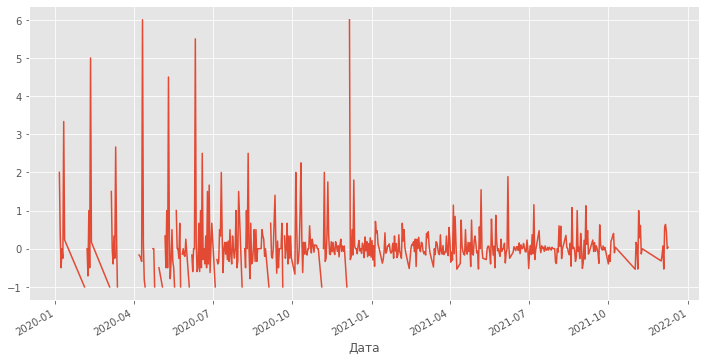

In [104]:
example['Смертей за день'].pct_change().plot(figsize=(12,6))

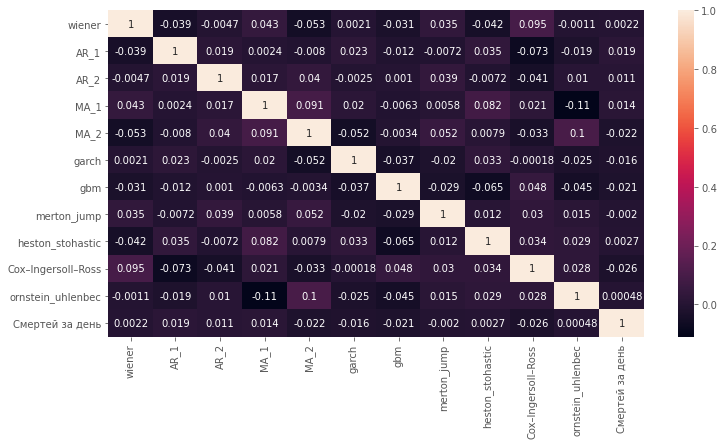

In [112]:
final_df=final_df[0:565]
final_df['Смертей за день']=example['Смертей за день'].values
ret=final_df.pct_change()
corr = ret.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True)

Данный процесс не похож ни на один из сгенерированных выше. Об этом же говорит и матрица корреляций.